In [83]:
## NN - FF and BP   
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import classification_report

# Import Portugal Wine Dataset (Discretized)
DF = pd.read_csv("~/Desktop/Undergrad/CSCI 5622 Machine Learning /Machine Learning Module 1/CADiscretized.csv")
DF= DF.iloc[: , 1:]
DF["Alcohol"] = np.where(DF["Alcohol"] == "High", 1, 0) 
print(DF.head())
print(DF.describe())

# y represents the label of the dataset.
#In this case, the Alcohol
y = np.array(DF.iloc[:,0]).T
y = np.array([y]).T
#print(y)

## Normalize the dataset 
DF=DF.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12]]
DF=(DF-DF.mean())/DF.std()
print(DF)
X = np.array(DF) # X matrix that contains predictors 
#print("X is\n", X)

InputColumns = 12
NumberOfLabels = 1
n = len(DF) # Length of Dataframe 

## Take the label off of X and make it a numpy array
LR=.01
LRB = .01

   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0        1        1.71  2.43          15.6        127           2.80   
1        1        1.78  2.14          11.2        100           2.65   
2        1        2.36  2.67          18.6        101           2.80   
3        1        1.95  2.50          16.8        113           3.85   
4        1        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45    

In [84]:
class NeuralNetwork(object):
    def __init__(self):
# First step is to initialize values and assign values to dataset 

        self.InputNumColumns = InputColumns
        self.OutputSize = 1
        self.HiddenUnits = 7  ## one layer with 4 hidden units
        self.n = n  ## number of training examples, n
        #print("Initialize NN\n")
        
        #Randomize weight  (W1)
        self.W1 = np.random.randn(self.InputNumColumns, self.HiddenUnits)  
       
        
        #print("INIT W1 is\n", self.W1)
        
        #Randomize weight (W2) 
        self.W2 = np.random.randn(self.HiddenUnits, self.OutputSize)
        #print("W2 is:\n", self.W2)
        
        #Bias for layer 1
        self.b = np.random.randn(1, self.HiddenUnits)
        #print("The b's are:\n", self.b)
        
        #Bias for last layer 
        self.c = np.random.randn(1, self.OutputSize)
        #print("The c is\n", self.c)
        
        
    def FeedForward(self, X):
        #print("FeedForward\n\n")
        
        # First Layer 
        self.z = (np.dot(X, self.W1)) + self.b 
        #print("Z1 is:\n", self.z.T)
        
        self.h = self.Sigmoid(self.z) #activation function (Sigmoidal)
        #print("H is:\n", self.h.T)
        
        # Last Layer 
        self.z2 = (np.dot(self.h, self.W2)) + self.c  
        #print("Z2 is:\n", self.z2.T)
        
        ## Output Activation (Last Layer)
        output = self.Sigmoid(self.z2)  
        #print("output Y^ is:\n", output.T)
        return output
    
    
    def Sigmoid(self, s, deriv=False):
# Define activation function (sigmoidal)
        if (deriv == True):
            return s * (1 - s)
        return 1/(1 + np.exp(-s))
    
    def BackProp(self, X, y, output):
# Train feed foward neural network using BackPropagation
        #print("\n\nBackProp\n")
        self.LR = LR  # Learning Rate of Model 
        self.LRB=LRB  # Learning Rate of Biases 
        self.output_error = output - y   # Essentially yhat-y
        #print("Y^ - Y\n", self.output_error)
        
        self.output_delta = self.output_error 
          
        self.D_Error_W2 = self.output_delta.dot(self.W2.T)
        
        self.H_D_Error_W2 = self.D_Error_W2 * self.Sigmoid(self.h, deriv=True) 
        
        
        #Update weights and biases
        
        self.X_H_D_Error_W2 = X.T.dot(self.H_D_Error_W2) #dW1
        
        self.h_output_delta = self.h.T.dot(self.output_delta) #dW2
        
        #print("Using sum gradient........\n")
        self.W1 = self.W1 - self.LR*(self.X_H_D_Error_W2)
        self.W2 = self.W2 - self.LR*(self.h_output_delta) 
        
        
        #print("The sum of the b update is\n", np.mean(self.H_D_Error_W2, axis=0))
        #print("The b biases before the update are:\n", self.b)
        self.b = self.b  - self.LRB*np.mean(self.H_D_Error_W2, axis=0)
        #print("Updated bs are:\n", self.b)
        
        self.c = self.c - self.LR*np.mean(self.output_delta, axis=0)
        
        #print("The W1 is: \n", self.W1)
        #print("The W1 gradient is: \n", self.X_H_D_Error_W2)
        #print("The W2 gradient  is: \n", self.h_output_delta)
        #print("The biases b gradient is:\n",np.mean(self.H_D_Error_W2, axis=0 ))
        #print("The bias c gradient is: \n", np.mean(self.output_delta, axis=0))
        
    def TrainNetwork(self, X, y):
        output = self.FeedForward(X)
        #print("Output in TNN\n", output)
        self.BackProp(X, y, output)
        return output

In [93]:
MyNN = NeuralNetwork()

TotalLoss=[]
AvgLoss=[]
Epochs=36

for i in range(Epochs): 
    print("\nRUN:\n ", i)
    output=MyNN.TrainNetwork(X, y)
    output=np.where(output > 0.5, 1, 0)  # Fix This 
    print('Prediction y^ is', output.T)
    print('Actual y is', y.T)
    loss=np.sum(np.square(output-y))
    avgLoss=np.mean(np.square(output-y))
    #print("The current average loss is\n", loss)
    TotalLoss.append(loss)
    AvgLoss.append(avgLoss)
   



RUN:
  0
Prediction y^ is [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
Actual y is [[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1
  1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1
  1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1
  0 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1]]

RUN:
  1
Prediction y^ is [[0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1 0 0 1 0 1
  1 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1
  0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 

[[78 15]
 [15 70]]
0.8314606741573034


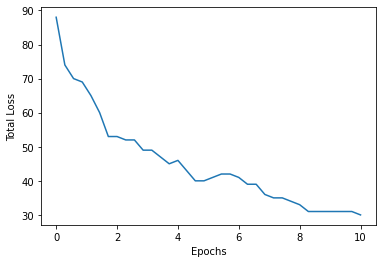

In [97]:
# Output of Neural Net Results 
fig1 = plt.figure()
ax = plt.axes()
x = np.linspace(0, 10, Epochs)
ax.plot(x, TotalLoss)    
ax.set_xlabel("Epochs")
ax.set_ylabel("Total Loss")

confusion=confusion_matrix(output, y)
accuracy=sum(confusion.diagonal())/confusion.sum()
print(confusion)
print(accuracy)